### Orijinal Dataset From:
https://www.kaggle.com/c/dogs-vs-cats/data

It includes 25K images but we'll reduce size for 1K for each classs and 500 test size for each one

In [183]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import MaxPool2D, Dropout, BatchNormalization, Dense, Input, Flatten
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import os, shutil

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Turn off scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

RANDOM_SEED =4299
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

### Creating Directory Structure 

Each directory will have its own cats and dogs folders seperately

In [14]:
original_dataset_dir = '/Users/serdar/DATASETS/animals2'
base_dir = '/Users/serdar/DATASETS/animals2/cats_and_dogs_small'
os.makedirs(base_dir)

In [15]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir)

In [16]:
train_cats_dir =  os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir)

train_dogs_dir =  os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir)

### Pick up 1000 samples from datasets

#### Copies the first 1000 cats images to train_cats_dir

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [24]:
for fname in fnames:
    # source
    src = os.path.join(original_dataset_dir+'/train', fname)

    # destination
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.0.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.1.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.2.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.3.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.4.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.5.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.6.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.7.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.8.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.9.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.10.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.11.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.12.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.13.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.14.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.15.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.16.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.17.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.18.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.19.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.20.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.21.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.22.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.23.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.24.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.25.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.26.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.27.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.28.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.29.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.30.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.31.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.32.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.33.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.34.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.35.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.36.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.37.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.38.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.39.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.40.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.41.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.42.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.43.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.44.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.45.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.46.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.47.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.48.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.49.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.50.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.51.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.52.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.53.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.54.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.55.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.56.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.57.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.58.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.59.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.60.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.61.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.62.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.63.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.64.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.65.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.66.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.67.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.68.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.69.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.70.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.71.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.72.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.73.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.74.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.75.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.76.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.77.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.78.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.79.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.80.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.81.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.82.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.83.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.84.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.85.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.86.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.87.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.88.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.89.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.90.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.91.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.92.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.93.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.94.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.95.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.96.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.97.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.98.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.99.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.100.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.101.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.102.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.103.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.104.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.105.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.106.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.107.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.108.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.109.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.110.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.111.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.112.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.113.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.114.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.115.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.116.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.117.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.118.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.119.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.120.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.121.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.122.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.123.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.124.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.125.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.126.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.127.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.128.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.129.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.130.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.131.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.132.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.133.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.134.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.135.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.136.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.137.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.138.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.139.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.140.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.141.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.142.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.143.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.144.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.145.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.146.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.147.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.148.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.149.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.150.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.151.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.152.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.153.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.154.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.155.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.156.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.157.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.158.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.159.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.160.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.161.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.162.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.163.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.164.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.165.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.166.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.167.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.168.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.169.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.170.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.171.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.172.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.173.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.174.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.175.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.176.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.177.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.178.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.179.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.180.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.181.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.182.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.183.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.184.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.185.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.186.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.187.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.188.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.189.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.190.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.191.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.192.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.193.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.194.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.195.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.196.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.197.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.198.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.199.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.200.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.201.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.202.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.203.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.204.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.205.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.206.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.207.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.208.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.209.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.210.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.211.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.212.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.213.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.214.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.215.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.216.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.217.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.218.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.219.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.220.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.221.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.222.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.223.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.224.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.225.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.226.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.227.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.228.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.229.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.230.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.231.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.232.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.233.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.234.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.235.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.236.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.237.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.238.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.239.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.240.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.241.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.242.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.243.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.244.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.245.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.246.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.247.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.248.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.249.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.250.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.251.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.252.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.253.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.254.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.255.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.256.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.257.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.258.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.259.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.260.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.261.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.262.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.263.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.264.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.265.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.266.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.267.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.268.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.269.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.270.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.271.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.272.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.273.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.274.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.275.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.276.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.277.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.278.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.279.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.280.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.281.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.282.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.283.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.284.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.285.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.286.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.287.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.288.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.289.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.290.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.291.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.292.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.293.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.294.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.295.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.296.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.297.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.298.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.299.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.300.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.301.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.302.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.303.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.304.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.305.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.306.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.307.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.308.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.309.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.310.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.311.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.312.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.313.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.314.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.315.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.316.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.317.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.318.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.319.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.320.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.321.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.322.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.323.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.324.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.325.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.326.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.327.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.328.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.329.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.330.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.331.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.332.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.333.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.334.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.335.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.336.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.337.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.338.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.339.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.340.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.341.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.342.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.343.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.344.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.345.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.346.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.347.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.348.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.349.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.350.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.351.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.352.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.353.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.354.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.355.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.356.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.357.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.358.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.359.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.360.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.361.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.362.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.363.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.364.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.365.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.366.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.367.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.368.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.369.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.370.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.371.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.372.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.373.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.374.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.375.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.376.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.377.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.378.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.379.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.380.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.381.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.382.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.383.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.384.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.385.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.386.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.387.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.388.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.389.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.390.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.391.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.392.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.393.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.394.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.395.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.396.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.397.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.398.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.399.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.400.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.401.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.402.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.403.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.404.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.405.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.406.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.407.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.408.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.409.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.410.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.411.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.412.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.413.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.414.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.415.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.416.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.417.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.418.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.419.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.420.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.421.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.422.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.423.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.424.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.425.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.426.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.427.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.428.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.429.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.430.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.431.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.432.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.433.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.434.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.435.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.436.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.437.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.438.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.439.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.440.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.441.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.442.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.443.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.444.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.445.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.446.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.447.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.448.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.449.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.450.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.451.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.452.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.453.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.454.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.455.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.456.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.457.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.458.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.459.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.460.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.461.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.462.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.463.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.464.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.465.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.466.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.467.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.468.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.469.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.470.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.471.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.472.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.473.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.474.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.475.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.476.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.477.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.478.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.479.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.480.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.481.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.482.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.483.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.484.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.485.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.486.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.487.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.488.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.489.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.490.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.491.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.492.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.493.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.494.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.495.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.496.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.497.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.498.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.499.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.500.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.501.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.502.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.503.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.504.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.505.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.506.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.507.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.508.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.509.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.510.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.511.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.512.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.513.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.514.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.515.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.516.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.517.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.518.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.519.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.520.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.521.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.522.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.523.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.524.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.525.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.526.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.527.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.528.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.529.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.530.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.531.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.532.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.533.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.534.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.535.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.536.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.537.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.538.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.539.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.540.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.541.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.542.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.543.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.544.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.545.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.546.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.547.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.548.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.549.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.550.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.551.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.552.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.553.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.554.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.555.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.556.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.557.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.558.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.559.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.560.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.561.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.562.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.563.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.564.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.565.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.566.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.567.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.568.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.569.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.570.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.571.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.572.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.573.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.574.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.575.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.576.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.577.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.578.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.579.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.580.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.581.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.582.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.583.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.584.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.585.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.586.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.587.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.588.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.589.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.590.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.591.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.592.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.593.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.594.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.595.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.596.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.597.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.598.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.599.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.600.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.601.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.602.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.603.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.604.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.605.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.606.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.607.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.608.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.609.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.610.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.611.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.612.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.613.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.614.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.615.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.616.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.617.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.618.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.619.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.620.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.621.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.622.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.623.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.624.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.625.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.626.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.627.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.628.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.629.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.630.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.631.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.632.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.633.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.634.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.635.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.636.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.637.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.638.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.639.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.640.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.641.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.642.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.643.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.644.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.645.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.646.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.647.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.648.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.649.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.650.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.651.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.652.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.653.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.654.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.655.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.656.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.657.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.658.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.659.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.660.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.661.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.662.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.663.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.664.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.665.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.666.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.667.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.668.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.669.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.670.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.671.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.672.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.673.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.674.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.675.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.676.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.677.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.678.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.679.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.680.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.681.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.682.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.683.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.684.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.685.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.686.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.687.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.688.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.689.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.690.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.691.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.692.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.693.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.694.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.695.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.696.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.697.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.698.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.699.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.700.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.701.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.702.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.703.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.704.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.705.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.706.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.707.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.708.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.709.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.710.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.711.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.712.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.713.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.714.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.715.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.716.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.717.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.718.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.719.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.720.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.721.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.722.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.723.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.724.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.725.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.726.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.727.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.728.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.729.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.730.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.731.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.732.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.733.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.734.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.735.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.736.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.737.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.738.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.739.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.740.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.741.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.742.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.743.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.744.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.745.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.746.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.747.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.748.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.749.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.750.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.751.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.752.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.753.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.754.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.755.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.756.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.757.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.758.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.759.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.760.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.761.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.762.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.763.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.764.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.765.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.766.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.767.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.768.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.769.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.770.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.771.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.772.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.773.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.774.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.775.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.776.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.777.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.778.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.779.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.780.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.781.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.782.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.783.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.784.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.785.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.786.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.787.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.788.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.789.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.790.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.791.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.792.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.793.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.794.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.795.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.796.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.797.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.798.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.799.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.800.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.801.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.802.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.803.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.804.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.805.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.806.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.807.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.808.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.809.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.810.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.811.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.812.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.813.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.814.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.815.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.816.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.817.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.818.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.819.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.820.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.821.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.822.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.823.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.824.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.825.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.826.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.827.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.828.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.829.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.830.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.831.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.832.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.833.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.834.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.835.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.836.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.837.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.838.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.839.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.840.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.841.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.842.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.843.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.844.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.845.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.846.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.847.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.848.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.849.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.850.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.851.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.852.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.853.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.854.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.855.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.856.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.857.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.858.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.859.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.860.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.861.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.862.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.863.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.864.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.865.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.866.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.867.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.868.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.869.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.870.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.871.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.872.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.873.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.874.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.875.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.876.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.877.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.878.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.879.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.880.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.881.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.882.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.883.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.884.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.885.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.886.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.887.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.888.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.889.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.890.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.891.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.892.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.893.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.894.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.895.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.896.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.897.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.898.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.899.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.900.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.901.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.902.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.903.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.904.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.905.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.906.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.907.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.908.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.909.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.910.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.911.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.912.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.913.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.914.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.915.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.916.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.917.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.918.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.919.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.920.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.921.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.922.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.923.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.924.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.925.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.926.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.927.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.928.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.929.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.930.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.931.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.932.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.933.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.934.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.935.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.936.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.937.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.938.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.939.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.940.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.941.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.942.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.943.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.944.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.945.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.946.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.947.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.948.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.949.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.950.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.951.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.952.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.953.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.954.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.955.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.956.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.957.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.958.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.959.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.960.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.961.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.962.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.963.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.964.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.965.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.966.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.967.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.968.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.969.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.970.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.971.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.972.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.973.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.974.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.975.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.976.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.977.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.978.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.979.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.980.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.981.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.982.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.983.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.984.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.985.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.986.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.987.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.988.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.989.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.990.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.991.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.992.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.993.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.994.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.995.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.996.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.997.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.998.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/cats/cat.999.jpg'

#### Copies the next 500 cats images to validation_cats_dir

In [32]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1000.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1001.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1002.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1003.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1004.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1005.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1006.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1007.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1008.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1009.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1010.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1011.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1012.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1013.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1014.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1015.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1016.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1017.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1018.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1019.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1020.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1021.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1022.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1023.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1024.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1025.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1026.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1027.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1028.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1029.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1030.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1031.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1032.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1033.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1034.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1035.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1036.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1037.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1038.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1039.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1040.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1041.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1042.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1043.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1044.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1045.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1046.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1047.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1048.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1049.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1050.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1051.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1052.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1053.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1054.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1055.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1056.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1057.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1058.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1059.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1060.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1061.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1062.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1063.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1064.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1065.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1066.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1067.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1068.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1069.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1070.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1071.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1072.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1073.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1074.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1075.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1076.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1077.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1078.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1079.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1080.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1081.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1082.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1083.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1084.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1085.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1086.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1087.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1088.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1089.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1090.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1091.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1092.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1093.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1094.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1095.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1096.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1097.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1098.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1099.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1100.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1101.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1102.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1103.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1104.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1105.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1106.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1107.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1108.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1109.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1110.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1111.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1112.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1113.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1114.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1115.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1116.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1117.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1118.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1119.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1120.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1121.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1122.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1123.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1124.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1125.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1126.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1127.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1128.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1129.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1130.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1131.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1132.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1133.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1134.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1135.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1136.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1137.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1138.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1139.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1140.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1141.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1142.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1143.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1144.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1145.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1146.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1147.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1148.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1149.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1150.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1151.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1152.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1153.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1154.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1155.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1156.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1157.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1158.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1159.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1160.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1161.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1162.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1163.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1164.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1165.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1166.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1167.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1168.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1169.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1170.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1171.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1172.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1173.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1174.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1175.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1176.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1177.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1178.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1179.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1180.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1181.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1182.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1183.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1184.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1185.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1186.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1187.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1188.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1189.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1190.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1191.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1192.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1193.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1194.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1195.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1196.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1197.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1198.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1199.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1200.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1201.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1202.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1203.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1204.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1205.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1206.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1207.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1208.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1209.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1210.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1211.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1212.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1213.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1214.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1215.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1216.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1217.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1218.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1219.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1220.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1221.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1222.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1223.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1224.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1225.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1226.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1227.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1228.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1229.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1230.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1231.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1232.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1233.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1234.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1235.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1236.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1237.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1238.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1239.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1240.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1241.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1242.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1243.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1244.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1245.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1246.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1247.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1248.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1249.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1250.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1251.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1252.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1253.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1254.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1255.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1256.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1257.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1258.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1259.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1260.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1261.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1262.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1263.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1264.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1265.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1266.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1267.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1268.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1269.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1270.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1271.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1272.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1273.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1274.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1275.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1276.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1277.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1278.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1279.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1280.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1281.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1282.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1283.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1284.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1285.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1286.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1287.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1288.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1289.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1290.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1291.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1292.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1293.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1294.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1295.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1296.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1297.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1298.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1299.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1300.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1301.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1302.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1303.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1304.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1305.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1306.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1307.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1308.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1309.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1310.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1311.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1312.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1313.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1314.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1315.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1316.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1317.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1318.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1319.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1320.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1321.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1322.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1323.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1324.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1325.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1326.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1327.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1328.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1329.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1330.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1331.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1332.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1333.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1334.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1335.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1336.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1337.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1338.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1339.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1340.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1341.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1342.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1343.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1344.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1345.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1346.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1347.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1348.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1349.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1350.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1351.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1352.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1353.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1354.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1355.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1356.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1357.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1358.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1359.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1360.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1361.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1362.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1363.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1364.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1365.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1366.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1367.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1368.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1369.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1370.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1371.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1372.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1373.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1374.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1375.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1376.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1377.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1378.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1379.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1380.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1381.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1382.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1383.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1384.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1385.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1386.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1387.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1388.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1389.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1390.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1391.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1392.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1393.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1394.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1395.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1396.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1397.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1398.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1399.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1400.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1401.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1402.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1403.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1404.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1405.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1406.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1407.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1408.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1409.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1410.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1411.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1412.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1413.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1414.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1415.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1416.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1417.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1418.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1419.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1420.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1421.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1422.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1423.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1424.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1425.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1426.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1427.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1428.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1429.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1430.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1431.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1432.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1433.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1434.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1435.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1436.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1437.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1438.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1439.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1440.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1441.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1442.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1443.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1444.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1445.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1446.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1447.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1448.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1449.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1450.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1451.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1452.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1453.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1454.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1455.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1456.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1457.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1458.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1459.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1460.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1461.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1462.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1463.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1464.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1465.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1466.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1467.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1468.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1469.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1470.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1471.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1472.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1473.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1474.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1475.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1476.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1477.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1478.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1479.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1480.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1481.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1482.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1483.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1484.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1485.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1486.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1487.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1488.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1489.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1490.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1491.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1492.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1493.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1494.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1495.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1496.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1497.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1498.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/cats/cat.1499.jpg'

#### Copies the next 500 cats images to test_cats_dir

In [33]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1500.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1501.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1502.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1503.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1504.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1505.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1506.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1507.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1508.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1509.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1510.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1511.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1512.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1513.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1514.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1515.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1516.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1517.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1518.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1519.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1520.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1521.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1522.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1523.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1524.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1525.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1526.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1527.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1528.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1529.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1530.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1531.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1532.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1533.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1534.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1535.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1536.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1537.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1538.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1539.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1540.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1541.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1542.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1543.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1544.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1545.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1546.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1547.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1548.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1549.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1550.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1551.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1552.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1553.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1554.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1555.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1556.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1557.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1558.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1559.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1560.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1561.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1562.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1563.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1564.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1565.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1566.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1567.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1568.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1569.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1570.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1571.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1572.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1573.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1574.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1575.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1576.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1577.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1578.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1579.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1580.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1581.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1582.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1583.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1584.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1585.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1586.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1587.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1588.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1589.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1590.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1591.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1592.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1593.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1594.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1595.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1596.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1597.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1598.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1599.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1600.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1601.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1602.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1603.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1604.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1605.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1606.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1607.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1608.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1609.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1610.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1611.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1612.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1613.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1614.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1615.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1616.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1617.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1618.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1619.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1620.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1621.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1622.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1623.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1624.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1625.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1626.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1627.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1628.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1629.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1630.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1631.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1632.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1633.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1634.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1635.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1636.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1637.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1638.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1639.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1640.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1641.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1642.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1643.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1644.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1645.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1646.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1647.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1648.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1649.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1650.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1651.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1652.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1653.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1654.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1655.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1656.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1657.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1658.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1659.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1660.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1661.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1662.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1663.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1664.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1665.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1666.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1667.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1668.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1669.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1670.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1671.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1672.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1673.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1674.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1675.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1676.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1677.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1678.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1679.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1680.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1681.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1682.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1683.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1684.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1685.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1686.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1687.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1688.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1689.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1690.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1691.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1692.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1693.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1694.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1695.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1696.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1697.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1698.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1699.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1700.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1701.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1702.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1703.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1704.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1705.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1706.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1707.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1708.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1709.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1710.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1711.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1712.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1713.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1714.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1715.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1716.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1717.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1718.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1719.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1720.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1721.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1722.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1723.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1724.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1725.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1726.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1727.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1728.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1729.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1730.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1731.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1732.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1733.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1734.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1735.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1736.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1737.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1738.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1739.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1740.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1741.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1742.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1743.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1744.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1745.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1746.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1747.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1748.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1749.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1750.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1751.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1752.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1753.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1754.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1755.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1756.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1757.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1758.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1759.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1760.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1761.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1762.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1763.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1764.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1765.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1766.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1767.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1768.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1769.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1770.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1771.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1772.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1773.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1774.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1775.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1776.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1777.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1778.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1779.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1780.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1781.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1782.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1783.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1784.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1785.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1786.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1787.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1788.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1789.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1790.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1791.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1792.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1793.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1794.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1795.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1796.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1797.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1798.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1799.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1800.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1801.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1802.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1803.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1804.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1805.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1806.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1807.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1808.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1809.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1810.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1811.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1812.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1813.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1814.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1815.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1816.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1817.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1818.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1819.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1820.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1821.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1822.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1823.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1824.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1825.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1826.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1827.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1828.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1829.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1830.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1831.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1832.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1833.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1834.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1835.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1836.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1837.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1838.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1839.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1840.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1841.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1842.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1843.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1844.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1845.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1846.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1847.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1848.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1849.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1850.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1851.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1852.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1853.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1854.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1855.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1856.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1857.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1858.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1859.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1860.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1861.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1862.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1863.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1864.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1865.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1866.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1867.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1868.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1869.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1870.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1871.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1872.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1873.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1874.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1875.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1876.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1877.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1878.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1879.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1880.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1881.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1882.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1883.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1884.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1885.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1886.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1887.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1888.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1889.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1890.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1891.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1892.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1893.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1894.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1895.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1896.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1897.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1898.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1899.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1900.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1901.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1902.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1903.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1904.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1905.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1906.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1907.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1908.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1909.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1910.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1911.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1912.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1913.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1914.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1915.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1916.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1917.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1918.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1919.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1920.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1921.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1922.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1923.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1924.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1925.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1926.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1927.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1928.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1929.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1930.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1931.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1932.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1933.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1934.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1935.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1936.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1937.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1938.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1939.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1940.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1941.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1942.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1943.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1944.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1945.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1946.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1947.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1948.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1949.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1950.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1951.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1952.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1953.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1954.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1955.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1956.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1957.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1958.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1959.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1960.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1961.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1962.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1963.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1964.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1965.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1966.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1967.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1968.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1969.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1970.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1971.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1972.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1973.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1974.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1975.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1976.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1977.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1978.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1979.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1980.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1981.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1982.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1983.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1984.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1985.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1986.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1987.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1988.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1989.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1990.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1991.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1992.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1993.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1994.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1995.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1996.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1997.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1998.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/cats/cat.1999.jpg'

#### Copies the first 1000 dogs images to train_dogs_dir

In [30]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.0.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.1.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.2.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.3.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.4.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.5.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.6.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.7.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.8.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.9.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.10.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.11.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.12.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.13.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.14.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.15.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.16.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.17.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.18.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.19.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.20.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.21.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.22.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.23.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.24.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.25.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.26.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.27.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.28.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.29.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.30.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.31.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.32.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.33.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.34.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.35.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.36.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.37.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.38.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.39.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.40.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.41.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.42.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.43.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.44.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.45.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.46.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.47.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.48.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.49.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.50.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.51.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.52.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.53.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.54.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.55.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.56.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.57.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.58.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.59.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.60.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.61.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.62.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.63.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.64.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.65.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.66.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.67.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.68.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.69.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.70.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.71.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.72.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.73.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.74.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.75.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.76.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.77.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.78.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.79.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.80.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.81.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.82.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.83.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.84.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.85.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.86.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.87.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.88.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.89.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.90.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.91.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.92.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.93.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.94.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.95.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.96.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.97.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.98.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.99.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.100.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.101.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.102.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.103.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.104.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.105.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.106.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.107.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.108.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.109.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.110.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.111.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.112.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.113.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.114.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.115.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.116.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.117.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.118.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.119.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.120.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.121.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.122.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.123.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.124.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.125.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.126.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.127.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.128.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.129.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.130.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.131.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.132.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.133.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.134.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.135.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.136.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.137.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.138.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.139.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.140.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.141.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.142.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.143.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.144.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.145.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.146.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.147.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.148.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.149.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.150.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.151.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.152.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.153.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.154.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.155.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.156.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.157.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.158.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.159.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.160.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.161.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.162.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.163.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.164.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.165.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.166.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.167.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.168.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.169.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.170.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.171.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.172.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.173.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.174.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.175.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.176.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.177.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.178.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.179.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.180.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.181.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.182.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.183.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.184.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.185.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.186.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.187.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.188.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.189.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.190.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.191.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.192.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.193.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.194.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.195.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.196.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.197.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.198.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.199.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.200.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.201.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.202.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.203.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.204.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.205.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.206.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.207.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.208.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.209.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.210.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.211.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.212.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.213.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.214.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.215.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.216.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.217.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.218.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.219.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.220.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.221.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.222.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.223.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.224.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.225.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.226.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.227.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.228.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.229.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.230.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.231.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.232.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.233.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.234.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.235.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.236.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.237.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.238.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.239.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.240.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.241.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.242.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.243.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.244.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.245.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.246.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.247.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.248.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.249.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.250.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.251.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.252.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.253.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.254.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.255.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.256.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.257.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.258.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.259.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.260.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.261.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.262.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.263.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.264.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.265.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.266.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.267.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.268.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.269.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.270.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.271.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.272.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.273.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.274.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.275.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.276.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.277.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.278.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.279.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.280.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.281.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.282.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.283.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.284.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.285.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.286.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.287.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.288.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.289.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.290.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.291.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.292.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.293.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.294.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.295.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.296.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.297.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.298.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.299.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.300.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.301.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.302.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.303.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.304.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.305.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.306.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.307.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.308.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.309.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.310.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.311.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.312.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.313.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.314.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.315.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.316.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.317.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.318.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.319.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.320.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.321.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.322.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.323.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.324.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.325.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.326.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.327.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.328.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.329.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.330.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.331.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.332.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.333.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.334.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.335.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.336.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.337.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.338.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.339.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.340.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.341.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.342.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.343.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.344.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.345.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.346.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.347.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.348.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.349.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.350.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.351.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.352.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.353.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.354.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.355.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.356.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.357.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.358.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.359.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.360.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.361.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.362.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.363.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.364.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.365.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.366.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.367.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.368.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.369.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.370.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.371.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.372.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.373.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.374.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.375.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.376.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.377.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.378.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.379.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.380.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.381.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.382.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.383.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.384.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.385.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.386.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.387.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.388.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.389.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.390.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.391.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.392.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.393.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.394.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.395.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.396.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.397.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.398.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.399.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.400.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.401.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.402.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.403.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.404.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.405.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.406.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.407.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.408.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.409.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.410.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.411.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.412.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.413.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.414.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.415.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.416.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.417.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.418.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.419.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.420.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.421.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.422.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.423.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.424.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.425.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.426.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.427.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.428.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.429.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.430.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.431.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.432.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.433.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.434.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.435.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.436.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.437.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.438.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.439.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.440.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.441.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.442.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.443.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.444.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.445.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.446.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.447.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.448.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.449.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.450.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.451.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.452.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.453.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.454.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.455.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.456.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.457.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.458.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.459.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.460.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.461.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.462.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.463.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.464.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.465.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.466.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.467.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.468.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.469.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.470.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.471.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.472.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.473.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.474.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.475.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.476.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.477.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.478.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.479.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.480.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.481.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.482.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.483.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.484.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.485.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.486.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.487.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.488.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.489.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.490.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.491.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.492.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.493.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.494.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.495.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.496.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.497.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.498.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.499.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.500.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.501.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.502.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.503.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.504.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.505.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.506.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.507.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.508.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.509.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.510.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.511.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.512.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.513.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.514.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.515.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.516.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.517.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.518.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.519.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.520.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.521.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.522.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.523.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.524.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.525.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.526.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.527.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.528.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.529.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.530.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.531.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.532.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.533.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.534.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.535.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.536.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.537.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.538.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.539.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.540.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.541.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.542.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.543.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.544.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.545.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.546.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.547.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.548.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.549.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.550.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.551.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.552.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.553.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.554.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.555.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.556.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.557.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.558.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.559.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.560.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.561.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.562.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.563.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.564.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.565.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.566.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.567.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.568.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.569.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.570.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.571.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.572.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.573.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.574.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.575.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.576.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.577.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.578.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.579.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.580.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.581.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.582.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.583.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.584.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.585.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.586.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.587.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.588.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.589.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.590.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.591.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.592.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.593.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.594.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.595.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.596.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.597.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.598.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.599.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.600.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.601.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.602.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.603.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.604.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.605.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.606.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.607.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.608.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.609.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.610.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.611.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.612.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.613.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.614.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.615.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.616.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.617.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.618.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.619.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.620.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.621.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.622.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.623.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.624.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.625.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.626.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.627.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.628.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.629.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.630.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.631.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.632.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.633.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.634.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.635.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.636.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.637.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.638.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.639.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.640.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.641.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.642.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.643.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.644.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.645.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.646.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.647.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.648.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.649.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.650.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.651.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.652.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.653.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.654.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.655.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.656.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.657.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.658.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.659.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.660.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.661.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.662.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.663.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.664.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.665.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.666.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.667.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.668.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.669.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.670.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.671.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.672.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.673.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.674.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.675.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.676.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.677.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.678.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.679.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.680.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.681.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.682.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.683.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.684.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.685.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.686.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.687.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.688.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.689.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.690.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.691.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.692.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.693.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.694.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.695.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.696.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.697.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.698.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.699.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.700.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.701.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.702.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.703.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.704.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.705.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.706.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.707.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.708.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.709.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.710.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.711.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.712.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.713.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.714.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.715.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.716.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.717.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.718.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.719.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.720.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.721.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.722.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.723.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.724.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.725.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.726.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.727.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.728.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.729.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.730.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.731.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.732.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.733.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.734.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.735.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.736.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.737.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.738.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.739.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.740.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.741.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.742.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.743.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.744.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.745.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.746.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.747.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.748.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.749.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.750.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.751.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.752.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.753.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.754.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.755.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.756.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.757.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.758.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.759.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.760.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.761.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.762.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.763.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.764.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.765.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.766.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.767.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.768.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.769.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.770.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.771.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.772.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.773.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.774.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.775.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.776.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.777.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.778.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.779.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.780.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.781.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.782.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.783.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.784.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.785.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.786.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.787.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.788.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.789.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.790.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.791.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.792.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.793.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.794.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.795.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.796.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.797.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.798.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.799.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.800.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.801.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.802.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.803.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.804.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.805.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.806.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.807.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.808.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.809.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.810.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.811.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.812.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.813.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.814.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.815.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.816.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.817.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.818.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.819.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.820.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.821.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.822.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.823.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.824.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.825.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.826.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.827.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.828.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.829.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.830.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.831.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.832.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.833.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.834.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.835.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.836.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.837.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.838.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.839.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.840.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.841.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.842.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.843.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.844.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.845.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.846.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.847.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.848.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.849.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.850.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.851.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.852.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.853.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.854.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.855.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.856.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.857.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.858.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.859.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.860.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.861.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.862.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.863.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.864.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.865.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.866.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.867.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.868.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.869.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.870.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.871.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.872.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.873.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.874.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.875.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.876.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.877.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.878.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.879.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.880.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.881.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.882.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.883.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.884.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.885.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.886.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.887.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.888.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.889.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.890.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.891.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.892.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.893.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.894.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.895.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.896.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.897.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.898.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.899.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.900.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.901.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.902.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.903.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.904.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.905.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.906.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.907.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.908.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.909.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.910.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.911.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.912.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.913.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.914.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.915.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.916.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.917.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.918.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.919.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.920.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.921.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.922.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.923.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.924.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.925.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.926.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.927.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.928.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.929.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.930.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.931.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.932.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.933.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.934.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.935.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.936.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.937.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.938.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.939.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.940.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.941.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.942.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.943.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.944.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.945.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.946.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.947.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.948.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.949.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.950.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.951.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.952.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.953.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.954.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.955.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.956.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.957.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.958.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.959.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.960.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.961.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.962.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.963.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.964.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.965.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.966.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.967.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.968.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.969.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.970.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.971.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.972.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.973.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.974.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.975.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.976.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.977.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.978.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.979.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.980.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.981.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.982.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.983.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.984.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.985.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.986.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.987.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.988.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.989.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.990.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.991.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.992.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.993.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.994.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.995.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.996.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.997.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.998.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/train/dogs/dog.999.jpg'

#### Copies the next 500 dogs images to validation_dogs_dir

In [34]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1000.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1001.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1002.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1003.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1004.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1005.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1006.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1007.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1008.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1009.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1010.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1011.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1012.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1013.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1014.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1015.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1016.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1017.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1018.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1019.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1020.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1021.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1022.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1023.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1024.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1025.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1026.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1027.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1028.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1029.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1030.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1031.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1032.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1033.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1034.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1035.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1036.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1037.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1038.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1039.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1040.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1041.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1042.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1043.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1044.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1045.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1046.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1047.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1048.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1049.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1050.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1051.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1052.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1053.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1054.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1055.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1056.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1057.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1058.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1059.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1060.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1061.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1062.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1063.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1064.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1065.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1066.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1067.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1068.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1069.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1070.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1071.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1072.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1073.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1074.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1075.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1076.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1077.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1078.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1079.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1080.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1081.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1082.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1083.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1084.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1085.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1086.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1087.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1088.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1089.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1090.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1091.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1092.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1093.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1094.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1095.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1096.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1097.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1098.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1099.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1100.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1101.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1102.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1103.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1104.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1105.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1106.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1107.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1108.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1109.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1110.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1111.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1112.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1113.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1114.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1115.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1116.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1117.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1118.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1119.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1120.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1121.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1122.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1123.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1124.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1125.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1126.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1127.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1128.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1129.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1130.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1131.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1132.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1133.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1134.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1135.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1136.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1137.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1138.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1139.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1140.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1141.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1142.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1143.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1144.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1145.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1146.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1147.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1148.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1149.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1150.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1151.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1152.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1153.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1154.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1155.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1156.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1157.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1158.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1159.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1160.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1161.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1162.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1163.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1164.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1165.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1166.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1167.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1168.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1169.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1170.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1171.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1172.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1173.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1174.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1175.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1176.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1177.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1178.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1179.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1180.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1181.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1182.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1183.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1184.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1185.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1186.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1187.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1188.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1189.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1190.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1191.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1192.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1193.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1194.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1195.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1196.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1197.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1198.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1199.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1200.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1201.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1202.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1203.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1204.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1205.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1206.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1207.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1208.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1209.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1210.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1211.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1212.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1213.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1214.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1215.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1216.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1217.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1218.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1219.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1220.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1221.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1222.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1223.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1224.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1225.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1226.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1227.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1228.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1229.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1230.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1231.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1232.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1233.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1234.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1235.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1236.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1237.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1238.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1239.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1240.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1241.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1242.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1243.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1244.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1245.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1246.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1247.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1248.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1249.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1250.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1251.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1252.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1253.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1254.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1255.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1256.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1257.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1258.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1259.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1260.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1261.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1262.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1263.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1264.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1265.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1266.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1267.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1268.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1269.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1270.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1271.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1272.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1273.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1274.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1275.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1276.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1277.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1278.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1279.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1280.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1281.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1282.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1283.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1284.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1285.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1286.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1287.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1288.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1289.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1290.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1291.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1292.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1293.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1294.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1295.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1296.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1297.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1298.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1299.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1300.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1301.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1302.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1303.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1304.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1305.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1306.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1307.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1308.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1309.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1310.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1311.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1312.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1313.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1314.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1315.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1316.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1317.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1318.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1319.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1320.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1321.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1322.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1323.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1324.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1325.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1326.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1327.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1328.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1329.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1330.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1331.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1332.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1333.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1334.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1335.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1336.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1337.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1338.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1339.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1340.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1341.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1342.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1343.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1344.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1345.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1346.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1347.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1348.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1349.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1350.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1351.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1352.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1353.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1354.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1355.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1356.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1357.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1358.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1359.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1360.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1361.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1362.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1363.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1364.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1365.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1366.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1367.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1368.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1369.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1370.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1371.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1372.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1373.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1374.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1375.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1376.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1377.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1378.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1379.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1380.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1381.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1382.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1383.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1384.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1385.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1386.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1387.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1388.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1389.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1390.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1391.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1392.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1393.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1394.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1395.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1396.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1397.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1398.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1399.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1400.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1401.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1402.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1403.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1404.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1405.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1406.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1407.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1408.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1409.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1410.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1411.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1412.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1413.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1414.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1415.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1416.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1417.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1418.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1419.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1420.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1421.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1422.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1423.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1424.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1425.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1426.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1427.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1428.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1429.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1430.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1431.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1432.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1433.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1434.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1435.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1436.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1437.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1438.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1439.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1440.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1441.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1442.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1443.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1444.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1445.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1446.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1447.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1448.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1449.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1450.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1451.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1452.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1453.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1454.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1455.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1456.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1457.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1458.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1459.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1460.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1461.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1462.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1463.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1464.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1465.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1466.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1467.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1468.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1469.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1470.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1471.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1472.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1473.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1474.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1475.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1476.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1477.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1478.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1479.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1480.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1481.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1482.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1483.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1484.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1485.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1486.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1487.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1488.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1489.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1490.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1491.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1492.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1493.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1494.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1495.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1496.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1497.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1498.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/validation/dogs/dog.1499.jpg'

#### Copies the next 500 dogs images to test_dogs_dir

In [35]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1500.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1501.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1502.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1503.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1504.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1505.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1506.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1507.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1508.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1509.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1510.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1511.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1512.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1513.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1514.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1515.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1516.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1517.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1518.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1519.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1520.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1521.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1522.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1523.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1524.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1525.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1526.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1527.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1528.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1529.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1530.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1531.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1532.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1533.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1534.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1535.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1536.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1537.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1538.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1539.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1540.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1541.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1542.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1543.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1544.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1545.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1546.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1547.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1548.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1549.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1550.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1551.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1552.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1553.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1554.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1555.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1556.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1557.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1558.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1559.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1560.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1561.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1562.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1563.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1564.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1565.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1566.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1567.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1568.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1569.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1570.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1571.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1572.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1573.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1574.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1575.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1576.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1577.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1578.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1579.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1580.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1581.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1582.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1583.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1584.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1585.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1586.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1587.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1588.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1589.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1590.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1591.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1592.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1593.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1594.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1595.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1596.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1597.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1598.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1599.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1600.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1601.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1602.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1603.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1604.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1605.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1606.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1607.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1608.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1609.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1610.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1611.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1612.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1613.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1614.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1615.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1616.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1617.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1618.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1619.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1620.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1621.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1622.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1623.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1624.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1625.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1626.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1627.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1628.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1629.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1630.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1631.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1632.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1633.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1634.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1635.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1636.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1637.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1638.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1639.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1640.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1641.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1642.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1643.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1644.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1645.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1646.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1647.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1648.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1649.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1650.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1651.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1652.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1653.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1654.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1655.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1656.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1657.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1658.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1659.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1660.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1661.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1662.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1663.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1664.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1665.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1666.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1667.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1668.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1669.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1670.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1671.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1672.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1673.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1674.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1675.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1676.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1677.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1678.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1679.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1680.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1681.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1682.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1683.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1684.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1685.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1686.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1687.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1688.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1689.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1690.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1691.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1692.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1693.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1694.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1695.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1696.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1697.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1698.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1699.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1700.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1701.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1702.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1703.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1704.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1705.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1706.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1707.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1708.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1709.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1710.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1711.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1712.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1713.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1714.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1715.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1716.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1717.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1718.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1719.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1720.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1721.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1722.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1723.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1724.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1725.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1726.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1727.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1728.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1729.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1730.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1731.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1732.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1733.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1734.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1735.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1736.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1737.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1738.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1739.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1740.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1741.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1742.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1743.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1744.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1745.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1746.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1747.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1748.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1749.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1750.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1751.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1752.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1753.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1754.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1755.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1756.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1757.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1758.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1759.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1760.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1761.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1762.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1763.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1764.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1765.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1766.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1767.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1768.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1769.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1770.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1771.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1772.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1773.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1774.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1775.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1776.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1777.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1778.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1779.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1780.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1781.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1782.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1783.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1784.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1785.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1786.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1787.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1788.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1789.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1790.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1791.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1792.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1793.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1794.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1795.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1796.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1797.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1798.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1799.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1800.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1801.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1802.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1803.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1804.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1805.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1806.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1807.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1808.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1809.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1810.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1811.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1812.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1813.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1814.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1815.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1816.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1817.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1818.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1819.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1820.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1821.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1822.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1823.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1824.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1825.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1826.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1827.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1828.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1829.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1830.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1831.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1832.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1833.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1834.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1835.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1836.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1837.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1838.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1839.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1840.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1841.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1842.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1843.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1844.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1845.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1846.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1847.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1848.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1849.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1850.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1851.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1852.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1853.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1854.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1855.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1856.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1857.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1858.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1859.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1860.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1861.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1862.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1863.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1864.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1865.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1866.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1867.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1868.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1869.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1870.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1871.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1872.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1873.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1874.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1875.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1876.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1877.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1878.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1879.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1880.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1881.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1882.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1883.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1884.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1885.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1886.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1887.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1888.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1889.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1890.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1891.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1892.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1893.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1894.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1895.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1896.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1897.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1898.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1899.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1900.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1901.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1902.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1903.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1904.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1905.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1906.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1907.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1908.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1909.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1910.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1911.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1912.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1913.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1914.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1915.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1916.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1917.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1918.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1919.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1920.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1921.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1922.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1923.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1924.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1925.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1926.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1927.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1928.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1929.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1930.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1931.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1932.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1933.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1934.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1935.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1936.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1937.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1938.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1939.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1940.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1941.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1942.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1943.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1944.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1945.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1946.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1947.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1948.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1949.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1950.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1951.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1952.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1953.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1954.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1955.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1956.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1957.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1958.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1959.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1960.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1961.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1962.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1963.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1964.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1965.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1966.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1967.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1968.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1969.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1970.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1971.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1972.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1973.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1974.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1975.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1976.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1977.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1978.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1979.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1980.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1981.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1982.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1983.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1984.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1985.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1986.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1987.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1988.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1989.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1990.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1991.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1992.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1993.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1994.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1995.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1996.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1997.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1998.jpg'

'/Users/serdar/DATASETS/animals2/cats_and_dogs_small/test/dogs/dog.1999.jpg'

#### Checking How Many Images We Have as a Sanity Check

In [49]:
print('[INFO] Total Training Cat Images   :', len(os.listdir(train_cats_dir)))
print('[INFO] Total Validation Cat Images :', len(os.listdir(validation_cats_dir)))
print('[INFO] Total Test Cat Images       :', len(os.listdir(test_cats_dir)))
print('[INFO] Total Training Dog Images   :', len(os.listdir(train_dogs_dir)))
print('[INFO] Total Validation Dog Images :', len(os.listdir(validation_dogs_dir)))
print('[INFO] Total Test Dog Images       :', len(os.listdir(test_dogs_dir)))

[INFO] Total Training Cat Images   : 1000
[INFO] Total Validation Cat Images : 500
[INFO] Total Test Cat Images       : 500
[INFO] Total Training Dog Images   : 1000
[INFO] Total Validation Dog Images : 500
[INFO] Total Test Dog Images       : 500


#### Delete Redundant Files from HardDisk

Just in case 4K sample biraktik hem cats hem dogs icin kalani sildik

In [43]:
fnames = ['cat.{}.jpg'.format(i) for i in range(4000, 12500)]
for fname in fnames:
    file_to_delete = os.path.join(original_dataset_dir+'/train', fname)
    os.remove(file_to_delete)    

In [44]:
fnames = ['dog.{}.jpg'.format(i) for i in range(4000, 12500)]
for fname in fnames:
    file_to_delete = os.path.join(original_dataset_dir+'/train', fname)
    os.remove(file_to_delete)  

### Building Network

In [ ]:
TARGET_SIZE = (150 ,150)

In [54]:
def create_model():
    
    inputs = Input(shape=(150, 150 ,3)) # input shape 150 by 150 with 3 color channel
    x = Conv2D(64, (3,3), activation='relu', )(inputs)
    x = MaxPool2D((2,2))(x)
    x = Conv2D(128, (3,3), activation='relu', )(x)
    x = MaxPool2D((2,2))(x)
    x = Conv2D(128, (3,3), activation='relu', )(x)
    x = MaxPool2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [55]:
model = create_model()

In [56]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0     

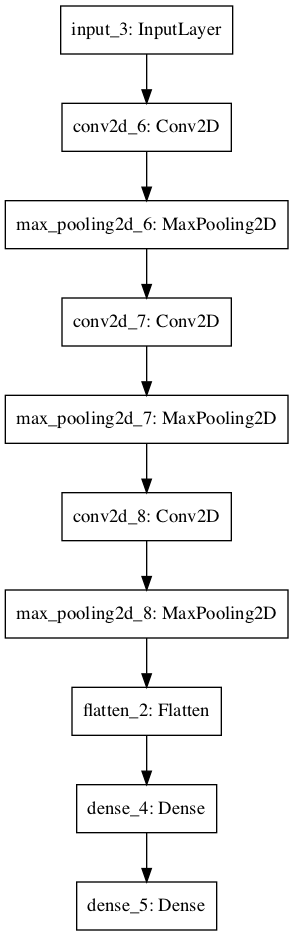

In [58]:
plot_model(model)

In [66]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

#### Use ImageDataGenerator to Read Images from Directories

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
# Resclaes all images by 1/255
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir, # target directory
                  target_size=(150, 150), # Resize all images to 150 by 150
                  batch_size= 20, 
                  class_mode = 'binary') # we use binary labels becase we use binary_crossentropy

Found 2000 images belonging to 2 classes.


In [69]:
validation_generator = train_datagen.flow_from_directory(
                       validation_dir, # target directory
                       target_size=(150, 150), # Resize all images to 150 by 150
                       batch_size= 20, 
                       class_mode = 'binary') # we use binary labels becase we use binary_crossentropy

Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

In [71]:
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape  : ', data_batch.shape)
    print('Labels Batch Shape: ', labels_batch.shape)
    break # WE HAVE TO PUT BREAK HERE, CUZ ITERATOR CONTINUES OTHERWISE

Data Batch Shape  :  (20, 150, 150, 3)
Labels Batch Shape:  (20,)


#### Using FIT_GENERATOR veya FIT 

It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn `steps_per_epoch` batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [74]:
history = model.fit(train_generator,
                             steps_per_epoch = 100, # each batch will have 20 images and we have 2000 images for train so 100 steps per epochs
                            epochs = 30, # training epoch size
                            validation_data = validation_generator,
                            validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 49s 490ms/step - loss: 0.6552 - accuracy: 0.6010 - val_loss: 0.6399 - val_accuracy: 0.6470
Epoch 2/30
100/100 [==============================] - 50s 497ms/step - loss: 0.5809 - accuracy: 0.7020 - val_loss: 0.6092 - val_accuracy: 0.6690
Epoch 3/30
100/100 [==============================] - 49s 486ms/step - loss: 0.5283 - accuracy: 0.7355 - val_loss: 0.6137 - val_accuracy: 0.6650
Epoch 4/30
100/100 [==============================] - 49s 488ms/step - loss: 0.4879 - accuracy: 0.7665 - val_loss: 0.5882 - val_accuracy: 0.6980
Epoch 5/30
100/100 [==============================] - 49s 488ms/step - loss: 0.4513 - accuracy: 0.7935 - val_loss: 0.5733 - val_accuracy: 0.7160
Epoch 6/30
100/100 [==============================] - 49s 494ms/step - loss: 0.4134 - accuracy: 0.8090 - val_loss: 0.5938 - val_accuracy: 0.7060
Epoch 7/30
100/100 [=================

### Saving Model

In [75]:
model.save('cats_and_dogs_small_1.h5')

In [87]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

In [145]:
def create_accuracy_plot(acc, val_acc):
    epochs = range(1, len(acc)+1)
    plt.clf()
    plt.figure(figsize=(8,6));
    plt.plot(epochs, acc, 'bo', label='Training Acc', color='coral');
    plt.plot(epochs, val_acc, 'b', label='Val Acc', color='coral');
    plt.title('Trainig vs Validation Acc');
    plt.grid(True);
    plt.legend();
    plt.show();

In [152]:
def create_loss_plot(loss, validation_loss):
    epochs = range(1, len(loss)+1)
    plt.clf()
    plt.figure(figsize=(8,6));
    plt.plot(epochs, loss, 'bo', label='Training Loss');
    plt.plot(epochs, validation_loss, 'b', label='Val Loss');
    plt.title('Trainig vs Validation Loss');
    plt.grid(True);
    plt.legend();
    plt.show();

<Figure size 432x288 with 0 Axes>

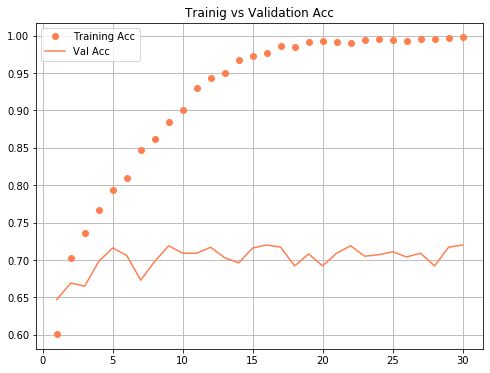

In [91]:
epochs = range(1, len(acc)+1)
plt.clf()
plt.figure(figsize=(8,6));
plt.plot(epochs, acc, 'bo', label='Training Acc', color='coral');
plt.plot(epochs, validation_acc, 'b', label='Val Acc', color='coral');
plt.title('Trainig vs Validation Acc');
plt.grid(True);
plt.legend();
plt.show();

<Figure size 432x288 with 0 Axes>

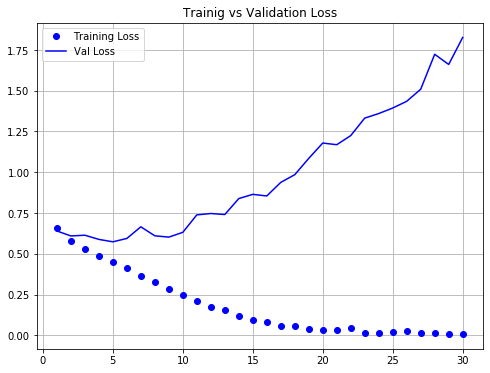

In [89]:
plt.clf()
plt.figure(figsize=(8,6));
plt.plot(epochs, loss, 'bo', label='Training Loss');
plt.plot(epochs, validation_loss, 'b', label='Val Loss');
plt.title('Trainig vs Validation Loss');
plt.grid(True);
plt.legend();
plt.show();

As we can see the validation loss is the minimum at 5th epoch then starts to overfit

### Data Augmentation

We have limited data so we can levarage data augmentation techniques to enhance out exsiting data

In [97]:
# rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
# width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
# shear_range is for randomly applying shearing transformations.
# zoom_range is for randomly zooming inside pictures.
# horizontal_flip is for randomly flipping half the images horizontally +++
# relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
# fill_mode is the strategy used for filling in newly created pixels, which can +++
# appear after a rotation or a width/height shift.
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

#### Displaying Randomly augmented training images

In [98]:
from tensorflow.keras.preprocessing import image

In [117]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[7] # choose an image to augment
img = image.load_img(img_path, target_size=(150, 150)) # Reads and resizes it

In [118]:
x = image.img_to_array(img) # Converting into numpy with shape of (150, 150, 3)
x.shape

(150, 150, 3)

In [119]:
x = x.reshape((1,) + x.shape) # rehapes to (1, 150, 150, 3)
x.shape

(1, 150, 150, 3)

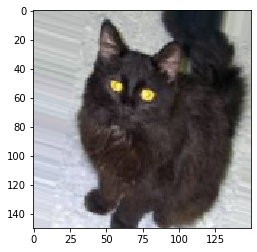

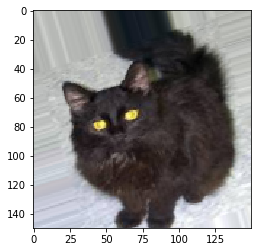

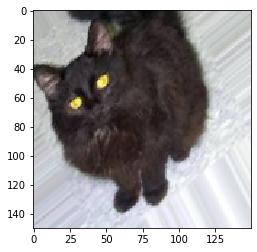

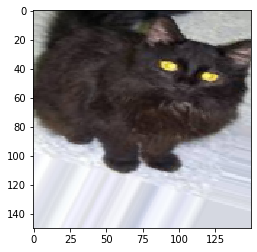

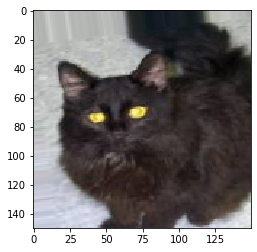

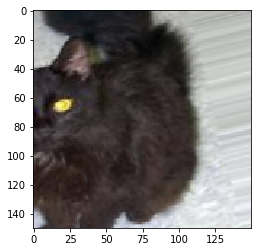

In [121]:
# Generates batches of randomly transformed images. 
# Loops indefinitely, so you need to break the loop at some point!
 
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0: break
plt.show();

If you train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a `Dropout` layer to your model, right before the densely connected classifier.

#### Adding Dropout

In [124]:
def create_model_2():
    
    inputs = Input(shape=(150, 150 ,3)) # input shape 150 by 150 with 3 color channel
    x = Conv2D(64, (3,3), activation='relu', )(inputs)
    x = MaxPool2D((2,2))(x)
    x = Conv2D(128, (3,3), activation='relu', )(x)
    x = MaxPool2D((2,2))(x)
    x = Conv2D(128, (3,3), activation='relu', )(x)
    x = MaxPool2D((2,2))(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [125]:
model2 = create_model_2()

In [126]:
model2.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [127]:
# Yukaridaki kodu burada tekrar edecegim

In [128]:
train_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

# NOTE: VALIDATION DATA SHOULD NOT BE AUGMENTED

In [129]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [130]:
train_generator = train_datagen.flow_from_directory(
                    train_dir, # target directory
                    target_size=(150, 150), # resize all images to 150 by 150
                    batch_size = 32,
                    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
                            validation_dir,
                            target_size = (150, 150),
                            batch_size  = 32,
                            class_mode  = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [135]:
history = model2.fit(train_generator,
                     steps_per_epoch=63, # 2000/32 = 62.5
                     epochs=100,
                     validation_data=validation_generator,
                     validation_steps=32) # 1000/32 = 31.75

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 32 steps
Epoch 1/100
63/63 [==============================] - 48s 762ms/step - loss: 0.6769 - accuracy: 0.5530 - val_loss: 0.6504 - val_accuracy: 0.6030
Epoch 2/100
63/63 [==============================] - 50s 793ms/step - loss: 0.6556 - accuracy: 0.5960 - val_loss: 0.6294 - val_accuracy: 0.6410
Epoch 3/100
63/63 [==============================] - 49s 779ms/step - loss: 0.6448 - accuracy: 0.6190 - val_loss: 0.6191 - val_accuracy: 0.6410
Epoch 4/100
63/63 [==============================] - 48s 757ms/step - loss: 0.6200 - accuracy: 0.6530 - val_loss: 0.6065 - val_accuracy: 0.6770
Epoch 5/100
63/63 [==============================] - 48s 762ms/step - loss: 0.6161 - accuracy: 0.6400 - val_loss: 0.6009 - val_accuracy: 0.6560
Epoch 6/100
63/63 [==============================] - 50s 791ms/step - loss: 0.6071 - accuracy: 0.6655 - val_loss: 0.6509 - val_accuracy: 0.6560
Epoch 7/100
63/63 [=========================

63/63 [==============================] - 47s 746ms/step - loss: 0.4563 - accuracy: 0.7750 - val_loss: 0.4686 - val_accuracy: 0.7590
Epoch 57/100
63/63 [==============================] - 47s 747ms/step - loss: 0.4485 - accuracy: 0.7900 - val_loss: 0.4679 - val_accuracy: 0.7760
Epoch 58/100
63/63 [==============================] - 47s 742ms/step - loss: 0.4521 - accuracy: 0.7945 - val_loss: 0.4873 - val_accuracy: 0.7850
Epoch 59/100
63/63 [==============================] - 47s 747ms/step - loss: 0.4406 - accuracy: 0.7970 - val_loss: 0.4587 - val_accuracy: 0.7850
Epoch 60/100
63/63 [==============================] - 47s 743ms/step - loss: 0.4450 - accuracy: 0.7935 - val_loss: 0.5172 - val_accuracy: 0.7640
Epoch 61/100
63/63 [==============================] - 47s 741ms/step - loss: 0.4357 - accuracy: 0.7935 - val_loss: 0.5160 - val_accuracy: 0.7500
Epoch 62/100
63/63 [==============================] - 47s 742ms/step - loss: 0.4398 - accuracy: 0.7985 - val_loss: 0.4849 - val_accuracy: 0.771

#### Save The Model

In [134]:
model2.save('cats_and_dogs_small_2.h5')

<Figure size 432x288 with 0 Axes>

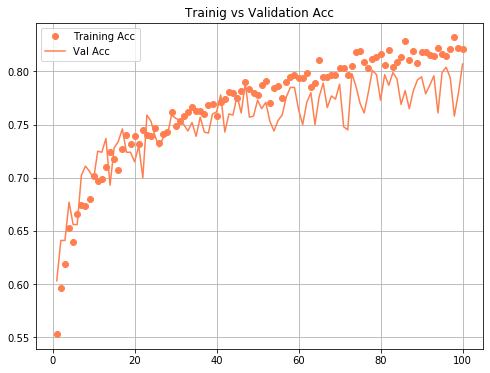

In [148]:
create_accuracy_plot(history.history['accuracy'], history.history['val_accuracy'])


<Figure size 432x288 with 0 Axes>

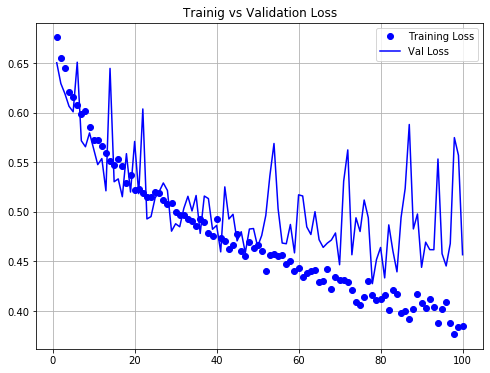

In [153]:
create_loss_plot(history.history['loss'], history.history['val_loss'])

### USING PRETRAINED MODEL

In [154]:
from tensorflow.keras.applications import VGG16

In [155]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [156]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

##### At this point, there are two ways you could proceed:
 `Running the convolutional base over your dataset`, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier similar to those you saw in part 1 of this book. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, `this technique won’t allow you to use data augmentation.`

 Extending the model you have (conv_base) by `adding Dense layers` on top, and running the whole thing end to end on the input data. This will `allow you to use data augmentation`, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, `this technique is far more expensive` than the first.

### Fast Feature Extraction without Data Augmentation - FIRST TECHNIQUE

In [167]:
data = ImageDataGenerator(rescale=1./255)
batch_size = 20

We'll extract features from these images by calling the `predict` method of the `conv_base` model.

In [168]:
def extract_features(directory, sample_count):
    # features shape i yukaridaki conv base in last layerinin shapeine istinaden tanimlanir.
    # Son MaxPooling ten sonra output (4,4,512)'dir 
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=BATCH_SIZE,
                                           class_mode='binary')
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        
        features[i * batch_size: (i+1) * batch_size] = features_batch
        labels[i * batch_size: (i+1) * batch_size] = labels_batch
    
        i += 1
        # Generators yield infinite loop to avoid this we have to break it
        if i * batch_size >= sample_count:
            break
    return features, labels                            

In [169]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are `currently of shape (samples, 4, 4, 512)`. We’ll feed them to a densely connected classifier, so first you must flatten them to `(samples, 8192)`

In [170]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [171]:
train_features.shape

(2000, 8192)

Now we define your densely connected classifier (note the use of `dropout` for regularization) and train it on the data and labels that we just recorded.

In [172]:
def create_model_FC_for_VGG16():
    inputs = Input(shape=(4 * 4* 512))
    x = Dense(256, activation='relu')(inputs)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [173]:
model3 = create_model_FC_for_VGG16()
model3.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [174]:
history3 = model3.fit(train_features, train_labels,
                     epochs=30,
                     batch_size=20,
                     validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 3.9680 - accuracy: 0.7635 - val_loss: 1.0222 - val_accuracy: 0.8820
Epoch 2/30
2000/2000 [==============================] - 2s 915us/sample - loss: 1.2055 - accuracy: 0.8850 - val_loss: 1.0490 - val_accuracy: 0.8890
Epoch 3/30
2000/2000 [==============================] - 2s 910us/sample - loss: 0.5615 - accuracy: 0.9385 - val_loss: 0.9078 - val_accuracy: 0.8910
Epoch 4/30
2000/2000 [==============================] - 2s 951us/sample - loss: 0.3785 - accuracy: 0.9495 - val_loss: 0.8978 - val_accuracy: 0.8970
Epoch 5/30
2000/2000 [==============================] - 2s 942us/sample - loss: 0.2234 - accuracy: 0.9690 - val_loss: 0.9729 - val_accuracy: 0.8950
Epoch 6/30
2000/2000 [==============================] - 2s 935us/sample - loss: 0.1627 - accuracy: 0.9725 - val_loss: 0.9009 - val_accuracy: 0.8920
Epoch 7/30
2000/2000 [==============================] - 2s 946us/s

<Figure size 432x288 with 0 Axes>

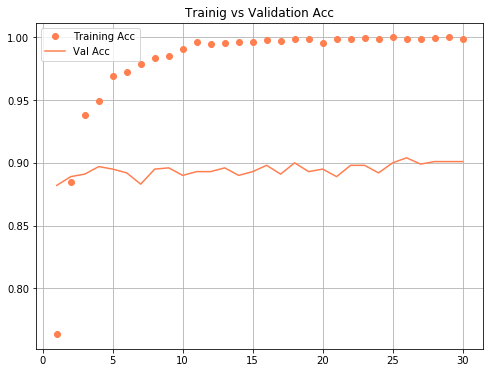

In [175]:
create_accuracy_plot(history3.history['accuracy'], history3.history['val_accuracy'])

<Figure size 432x288 with 0 Axes>

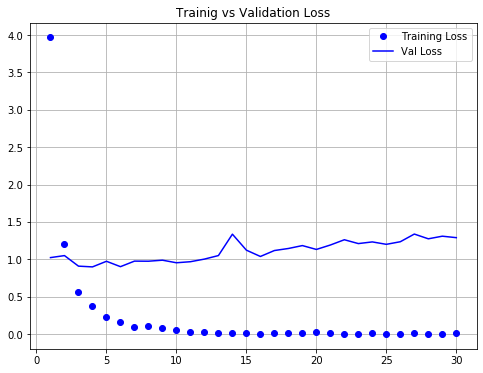

In [176]:
create_loss_plot(history3.history['loss'], history3.history['val_loss'])

You reach a validation accuracy of about 90%—much better than you achieved in the previous section with the small model trained from scratch. But the plots also indicate that you’re overfitting almost from the start—despite using dropout with a fairly large rate. That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets.

### Feature Extraction with Data Augmentation - SECOND TECHNIQUE

This is `much slower and more expensive`, but which `allows you to use data augmentation` during training: extending the conv_base model and running it end to end on the inputs.

##### THIS TECHNIQUE SHOULD BE RUN ONLY ON GPU, otherwise use the first technique

In [239]:
model4 = Sequential()
model4.add(conv_base)
model4.add(Flatten()) 
model4.add(Dense(256, activation='relu')) 
model4.add(Dense(1, activation='sigmoid'))

In [240]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


Before you compile and train the model, it’s very important to `freeze the convolutional base.`
In Keras, you freeze a network by setting its `trainable attribute` to `False`

In [219]:
print('Trainable Weight Size BEFORE Freeze: ', len(model4.trainable_weights))

Trainable Weight Size BEFORE Freeze:  4


In [220]:
conv_base.trainable = False

In [221]:
print('Trainable Weight Size AFTER Freeze: ', len(model4.trainable_weights))

Trainable Weight Size AFTER Freeze:  4


With this setup, `only the weights from the two Dense layers that you added will be trained`. That’s a total of four weight tensors: two per layer (the main weight matrix and the bias vector). Note that in order for these changes to take effect, `you must first compile the model`. If you ever modify weight trainability after compilation, you should then recompile the model, or these changes will be ignored.

In [222]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

In [223]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                           target_size=(150,150),
                                           batch_size=20,
                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [224]:
# NO AUGMENTATION FOR VALIDATION DATA
test_datagen = ImageDataGenerator(rescale=1./255)

In [225]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                           target_size=(150,150),
                                           batch_size=20,
                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


In [226]:
model4.compile(loss='binary_crossentropy', 
               optimizer=optimizers.RMSprop(lr=2e-5),
               metrics=['acc'])

In [227]:
history4 = model4.fit_generator(train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 98s 984ms/step - loss: 0.5694 - acc: 0.7070 - val_loss: 0.4603 - val_acc: 0.7710
Epoch 2/30
100/100 [==============================] - 100s 999ms/step - loss: 0.4666 - acc: 0.7815 - val_loss: 0.3492 - val_acc: 0.8640
Epoch 3/30
100/100 [==============================] - 101s 1s/step - loss: 0.4212 - acc: 0.8165 - val_loss: 0.3116 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 0.3908 - acc: 0.8310 - val_loss: 0.2961 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 102s 1s/step - loss: 0.3759 - acc: 0.8285 - val_loss: 0.2885 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 104s 1s/step - loss: 0.3659 - acc: 0.8405 - val_loss: 0.2780 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 102s 1s/step - loss: 0.3517 - acc: 0.8525 - val_lo

<Figure size 432x288 with 0 Axes>

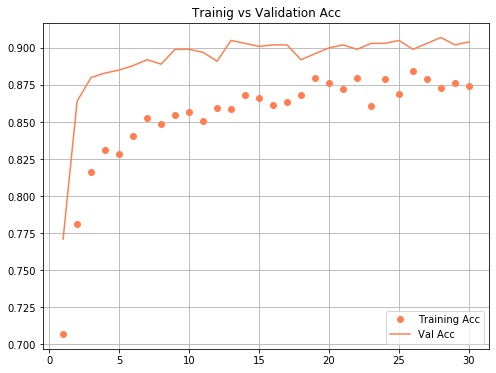

In [228]:
create_accuracy_plot(history4.history['acc'], history4.history['val_acc'])

In [229]:
history4.history.items()

dict_items([('loss', [0.5694104966521263, 0.46659946620464327, 0.4211788074672222, 0.39075968906283376, 0.375858750641346, 0.3658705684542656, 0.35169224083423617, 0.3492913757264614, 0.32801326990127566, 0.33680010616779327, 0.32254199504852293, 0.32502534590661525, 0.3117812380194664, 0.2984537573158741, 0.3124196065217257, 0.3105604176223278, 0.3058099444210529, 0.30747638814151285, 0.28764038532972336, 0.2904650401324034, 0.29536679610610006, 0.293405701443553, 0.2995597257465124, 0.27968508027493955, 0.28519929081201556, 0.27545057199895384, 0.2808561799675226, 0.28093347378075123, 0.29324762500822543, 0.2774788299202919]), ('acc', [0.707, 0.7815, 0.8165, 0.831, 0.8285, 0.8405, 0.8525, 0.8485, 0.855, 0.8565, 0.8505, 0.8595, 0.8585, 0.8685, 0.8665, 0.8615, 0.8635, 0.868, 0.8795, 0.876, 0.8725, 0.8795, 0.861, 0.879, 0.869, 0.8845, 0.879, 0.873, 0.876, 0.874]), ('val_loss', [0.46031894445419314, 0.34919244527816773, 0.3115744605660439, 0.29613237500190737, 0.28852003812789917, 0.2780

<Figure size 432x288 with 0 Axes>

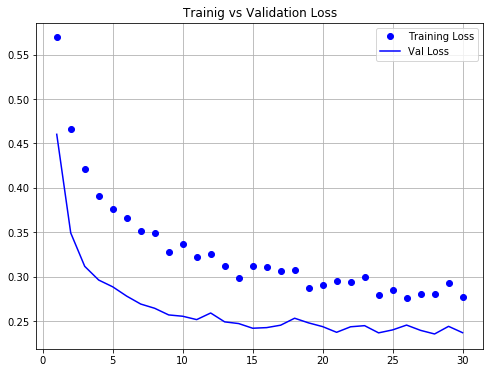

In [230]:
create_loss_plot(history4.history['loss'], history4.history['val_loss'])

## Fine Tuning

Another widely used technique for model reuse, complementary to feature extraction, is fine-tuning (see figure 5.19). Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers.

We’ll fine-tune `the last three convolutional layers`, which means `all layers up to block4_pool` should be `frozen`, and the layers `block5_conv1`, `block5_conv2`, and `block5_conv3` should be `trainable.`

### Freezing All Layers Up to a Spesific One

In [232]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers: 
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False     

#### Fine-Tuning

You’ll do this with the RMSProp optimizer, `using a very low learning rate`. The reason for using a low learning rate is that you want to limit the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

In [241]:
from tensorflow.keras import optimizers
model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [242]:
history5 = model4.fit(train_generator,
                     steps_per_epoch=100,
                     epochs=100,
                     validation_data=validation_generator,
                     validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 117s 1s/step - loss: 0.4957 - acc: 0.7645 - val_loss: 0.2721 - val_acc: 0.8860
Epoch 2/100
100/100 [==============================] - 119s 1s/step - loss: 0.3273 - acc: 0.8535 - val_loss: 0.2110 - val_acc: 0.9100
Epoch 3/100
100/100 [==============================] - 119s 1s/step - loss: 0.2788 - acc: 0.8895 - val_loss: 0.1939 - val_acc: 0.9170
Epoch 4/100
100/100 [==============================] - 119s 1s/step - loss: 0.2487 - acc: 0.8965 - val_loss: 0.2036 - val_acc: 0.9130
Epoch 5/100
100/100 [==============================] - 119s 1s/step - loss: 0.2396 - acc: 0.8930 - val_loss: 0.2069 - val_acc: 0.9120
Epoch 6/100
100/100 [==============================] - 119s 1s/step - loss: 0.2268 - acc: 0.9050 - val_loss: 0.1752 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 119s 1s/step - loss: 0.2075 - acc: 0.9115 - val_

100/100 [==============================] - 116s 1s/step - loss: 0.0342 - acc: 0.9890 - val_loss: 0.2530 - val_acc: 0.9330
Epoch 61/100
100/100 [==============================] - 115s 1s/step - loss: 0.0324 - acc: 0.9855 - val_loss: 0.2981 - val_acc: 0.9240
Epoch 62/100
100/100 [==============================] - 116s 1s/step - loss: 0.0368 - acc: 0.9870 - val_loss: 0.2230 - val_acc: 0.9310
Epoch 63/100
100/100 [==============================] - 115s 1s/step - loss: 0.0320 - acc: 0.9885 - val_loss: 0.2070 - val_acc: 0.9290
Epoch 64/100
100/100 [==============================] - 115s 1s/step - loss: 0.0406 - acc: 0.9865 - val_loss: 0.2397 - val_acc: 0.9340
Epoch 65/100
100/100 [==============================] - 116s 1s/step - loss: 0.0406 - acc: 0.9885 - val_loss: 0.2228 - val_acc: 0.9310
Epoch 66/100
100/100 [==============================] - 115s 1s/step - loss: 0.0366 - acc: 0.9850 - val_loss: 0.2279 - val_acc: 0.9300
Epoch 67/100
100/100 [==============================] - 115s 1s/step

<Figure size 432x288 with 0 Axes>

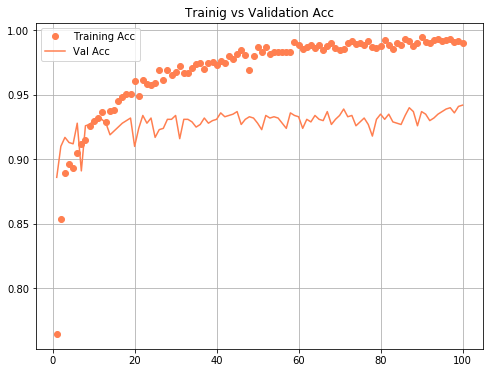

In [243]:
create_accuracy_plot(history5.history['acc'], history5.history['val_acc'])

<Figure size 432x288 with 0 Axes>

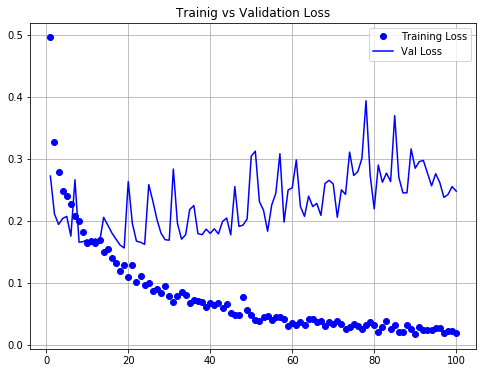

In [244]:
create_loss_plot(history5.history['loss'], history5.history['val_loss'])

These curves look noisy. To make them more readable, you can smooth them by replacing every loss and accuracy with exponential moving averages of these quanti- ties. Here’s a trivial utility function to do this

In [253]:
# def smooth_curve(points, factor=0.8): 
#     smoothed_points = []
#     for point in points:
#         if smoothed_points:
#             previous = smoothed_points[-1]
#             smoothed_points.append(previous * factor + point * (1 - factor))
#         else: smoothed_points.append(point)
#     return smoothed_points

# plt.plot(epochs, smooth_curve(history5.history['acc']), 'bo', label='Smoothed training acc')
# plt.plot(epochs, smooth_curve(history5.history['val_acc']), 'b', label='Smoothed validation acc')
# plt.title('Training and validation accuracy') 
# plt.legend()

# plt.figure()
# plt.plot(epochs, smooth_curve(history5.history['loss']), 'bo', label='Smoothed training loss')
# plt.plot(epochs, smooth_curve(history5.history['val_loss']), 'b', label='Smoothed validation loss')
# plt.title('Training and validation loss') 
# plt.legend()
# plt.show()